<a href="https://colab.research.google.com/github/beastkp/side_effects_ann/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_samples=[]
train_labels =[]


Data:


*   Drug was tested on indivisuals from age 13 to 100
*   The trial had 2100 people half were above 65 and half below
*   Around 95% people above 65 experienced side effects
*   Around 95% people below 65 did not experience side effects



#Creation of dataset

In [3]:
for i in range(50):
  # 5% of younger pop who experienced side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # 5% of older pop who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # 95% of younger pop who didnt experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # 95% of older pop who experienced side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

  #here 1 represents people who experienced side-effects and 0 for people who did not.
  

In [4]:
for i in train_samples:
  print(i)

50
98
60
72
33
96
42
76
30
70
36
73
61
71
14
81
21
89
58
73
39
70
51
65
15
85
31
93
13
87
17
91
55
95
33
96
49
68
41
71
48
92
55
84
63
79
15
96
35
70
49
72
51
84
14
84
47
95
22
67
21
88
58
87
30
99
29
94
62
94
44
95
50
99
51
82
35
82
64
66
13
90
31
79
64
77
33
72
40
94
15
98
29
95
52
83
18
90
17
69
42
70
31
78
47
69
60
81
24
93
59
79
45
80
17
94
47
65
42
100
56
83
55
80
45
95
40
78
43
91
28
81
38
75
35
96
25
95
23
97
59
73
30
85
27
72
17
85
27
91
41
78
14
79
31
94
13
67
43
95
23
78
51
99
45
88
51
98
39
69
60
76
39
65
46
76
42
69
54
80
17
87
29
84
35
86
48
76
61
79
33
80
16
93
18
70
27
81
49
95
19
72
30
76
27
87
35
100
13
100
63
83
64
70
21
79
33
72
30
89
41
98
42
70
46
84
39
93
45
66
57
72
53
100
13
79
35
85
21
77
55
85
43
72
49
72
56
70
24
79
55
90
17
67
24
81
59
72
61
72
57
74
18
89
56
96
15
68
58
78
62
98
49
97
33
86
32
81
31
89
15
68
58
81
17
84
43
98
21
84
32
94
27
84
23
68
13
88
44
70
31
81
54
96
64
71
42
93
50
75
57
83
24
89
40
97
31
87
34
92
47
82
45
80
30
73
18
72
19
84
43
92


In [5]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_labels,train_samples = shuffle(train_labels,train_samples)

In [6]:
scaler  = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
# transforms the data of age into data between 0 and 1

In [7]:
for i in scaled_train_samples:
  print(i)

[0.3908046]
[0.06896552]
[0.26436782]
[0.66666667]
[0.95402299]
[0.79310345]
[1.]
[0.93103448]
[0.7816092]
[0.97701149]
[0.75862069]
[0.66666667]
[0.47126437]
[0.3908046]
[0.14942529]
[0.65517241]
[0.7816092]
[0.70114943]
[0.86206897]
[0.12643678]
[0.94252874]
[0.67816092]
[0.16091954]
[0.10344828]
[0.6091954]
[0.25287356]
[0.62068966]
[0.24137931]
[0.94252874]
[0.66666667]
[0.11494253]
[0.59770115]
[0.16091954]
[0.04597701]
[0.7816092]
[0.4137931]
[0.83908046]
[0.4137931]
[0.63218391]
[0.3908046]
[0.7816092]
[0.02298851]
[0.36781609]
[0.6091954]
[0.33333333]
[0.90804598]
[0.86206897]
[0.36781609]
[0.02298851]
[0.]
[0.67816092]
[0.7816092]
[0.24137931]
[0.70114943]
[1.]
[0.64367816]
[0.97701149]
[0.13793103]
[0.79310345]
[0.68965517]
[0.95402299]
[0.98850575]
[0.22988506]
[0.48275862]
[0.7816092]
[0.34482759]
[0.26436782]
[0.17241379]
[0.59770115]
[0.68965517]
[0.65517241]
[0.6091954]
[0.37931034]
[0.77011494]
[0.98850575]
[0.31034483]
[0.71264368]
[0.50574713]
[0.24137931]
[0.27586207

#Training the model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy



In [9]:
physical_devices =tf.config.experimental.list_physical_devices('GPU')
print("Num of GPU's : ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num of GPU's :  1


In [10]:
model = Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split = 0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)
# shuffle the data before calling the fir function as val takes the last percent of the unshuffled data 

Epoch 1/30
189/189 - 7s - loss: 0.6871 - accuracy: 0.5048 - val_loss: 0.6764 - val_accuracy: 0.5095 - 7s/epoch - 38ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6618 - accuracy: 0.5640 - val_loss: 0.6542 - val_accuracy: 0.5667 - 507ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6350 - accuracy: 0.6402 - val_loss: 0.6245 - val_accuracy: 0.6571 - 503ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.6040 - accuracy: 0.7085 - val_loss: 0.5970 - val_accuracy: 0.6952 - 510ms/epoch - 3ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5777 - accuracy: 0.7476 - val_loss: 0.5717 - val_accuracy: 0.7190 - 491ms/epoch - 3ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5520 - accuracy: 0.7693 - val_loss: 0.5457 - val_accuracy: 0.7476 - 505ms/epoch - 3ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5268 - accuracy: 0.7995 - val_loss: 0.5201 - val_accuracy: 0.7667 - 499ms/epoch - 3ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5020 - accuracy: 0.8233 - val_loss: 0.4949 - val_accuracy: 0.7905 - 476ms/epoch - 3ms/step
Ep

#Creating test data

In [14]:
test_samples=[]
test_labels=[]


In [15]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):

  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels,test_samples = shuffle(test_labels,test_samples)

In [17]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

#Prediction

In [18]:
predict = model.predict(x=scaled_test_samples,batch_size=10,verbose=2)

42/42 - 0s - 147ms/epoch - 3ms/step


In [19]:
for i in predict:
  print(i)

[0.20862877 0.7913712 ]
[0.56610477 0.4338953 ]
[0.9487356  0.05126442]
[0.03645821 0.96354175]
[0.8919861  0.10801392]
[0.02367896 0.97632104]
[0.8658975  0.13410252]
[0.9367894  0.06321064]
[0.9413304  0.05866963]
[0.9478735  0.05212656]
[0.8169949  0.18300512]
[0.9367894  0.06321064]
[0.47425598 0.52574396]
[0.73185635 0.26814365]
[0.04881766 0.9511823 ]
[0.93916065 0.06083941]
[0.38411692 0.6158831 ]
[0.18904546 0.8109546 ]
[0.7978813  0.20211872]
[0.56610477 0.4338953 ]
[0.02735944 0.97264063]
[0.9480728  0.05192722]
[0.06260937 0.9373907 ]
[0.68092656 0.31907347]
[0.02367896 0.97632104]
[0.77731544 0.2226845 ]
[0.03915354 0.9608464 ]
[0.35546 0.64454]
[0.41360176 0.5863983 ]
[0.65362656 0.34637347]
[0.9444865  0.05551352]
[0.12474079 0.8752592 ]
[0.68092656 0.31907347]
[0.68092656 0.31907347]
[0.03394185 0.9660581 ]
[0.22966637 0.7703336 ]
[0.22966637 0.7703336 ]
[0.9478735  0.05212656]
[0.03394185 0.9660581 ]
[0.94873214 0.05126789]
[0.09061046 0.9093895 ]
[0.02202448 0.9779755 

In [20]:
rounded_predictions = np.argmax(predict,axis=1)


In [21]:
for i in rounded_predictions:
  print(i)

1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
1
0
0
0
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0


#Confusion matrix

In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import itertools
from matplotlib import pyplot as plt


In [23]:
cm = confusion_matrix(y_true = test_labels,y_pred = rounded_predictions)

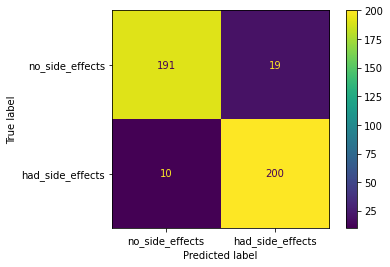

In [24]:
cm_plot_labels = ['no_side_effects','had_side_effects']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()


In [25]:
from tensorflow.keras.models import load_model
import os.path

if os.path.isfile('/content/medical_trial.h5') is False:
  model.save('/content/medical_trial.h5')


new_model = load_model('/content/medical_trial.h5')


In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
json_string = model.to_json()

In [33]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r